# Central Limit Theorem
The Central Limit Theorem, or CLT for short, is an important finding and pillar in the fields of statistics and probability. The theorem states that as the size of the sample increases, the distribution of the mean across multiple samples will approximate a Gaussian distribution. We can imagine performing a trial and getting a result or an observation. We can repeat the trial again and get a new independent observation. Collected together, multiple observations represents a sample of observations.

A sample is a group of observations from a broader population of all possible observations that could be made given trials.
* Observation: Result from one trial of an experiment.
* Sample: Group of results gathered from separate independent trials.
* Population: Space of all possible observations that could be seen from a trial.

If we calculate the mean of a sample, it will be an estimate of the mean of the population distribution. But, like any estimate, it will be wrong and will contain some error. If we draw multiple independent samples, and calculate their means, the distribution of those means will form a Gaussian distribution. It is important that each trial that results in an observation be independent and performed in the same way. This is to ensure that the sample is drawing from the same underlying population distribution. More formally, this expectation is referred to as independent and identically distributed, or iid.
* Firstly, the central limit theorem is impressive, especially as this will occur no matter the shape of the population distribution from which we are drawing samples. It demonstrates that the distribution of errors from estimating the population mean fit a distribution that the field of statistics knows a lot about.
* Secondly, this estimate of the Gaussian distribution will be more accurate as the size of the samples drawn from the population is increased. This means that if we use our knowledge of the Gaussian distribution in general to start making inferences about the means of samples drawn from a population, that these inferences will become more useful as we increase our sample size.

Online Resources:
* https://machinelearningmastery.com/a-gentle-introduction-to-the-central-limit-theorem-for-machine-learning/

# Law of Large Numbers
The law of large numbers is another different theorem from statistics. It is simpler in that it states that as the size of a sample is increased, the more accurate of an estimate the sample mean will be of the population mean.

This theorem describes the result of repeating the same experiment a large number of times. The large numbers theorem states that if the same experiment or study is repeated independently, a large number of times, the average of the results of the trials must be close to the expected value. The result becomes closer to the expected value as the number of trials increases.

The law of large numbers is an important concept in statistics because it states that even random events with a large number of trials may return stable long-term results. It also demonstrates and proves the fundamental relationship between the concepts of probability and frequency.

The central limit theorem does not state anything about a single sample mean; instead, it is broader and states something about the shape or the distribution of sample means. The law of large numbers is intuitive. It is why we think that collecting more data will lead to a more representative sample of observations from the domain. The theorem supports this intuition.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#set a random seed to replicate the results
np.random.seed(42)

#generate ten random numbers (0 or 1) with equal probabilities
coin_flips_10 = np.random.randint(0,2,10)
coin_flips_10

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 1])

In [2]:
#how many heads in 10 coin flips
count_heads = sum(coin_flips_10 == 1)
print(count_heads)

3


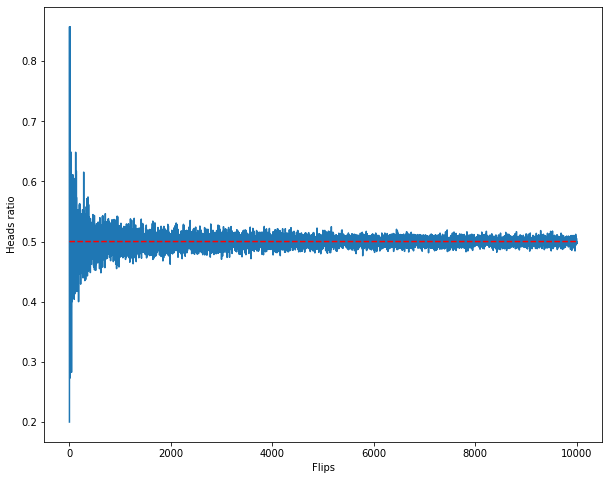

In [3]:
heads_ratio_nflips = []

#generate integers from 5 to 10,000
n_flips = np.arange(5,10000)

for flips in n_flips:
    #how many heads / flips
    heads_ratio = sum(np.random.randint(0,2,flips) == 1) / flips
    
    #append ratios to empty list
    heads_ratio_nflips.append(heads_ratio)
    
#set plot size
plt.figure(figsize = (10,8))

#number of flips on the x axis, heads ratio on y axis
plt.plot(n_flips, heads_ratio_nflips)

#expected ratio
plt.plot(n_flips, len(n_flips)*[0.5], 'r--')

#plot settings
plt.xlabel('Flips')
plt.ylabel('Heads ratio')

#show the plot
plt.show()

# Hypothesis Test
A hypothesis test is a statistical test that is used to determine whether there is enough evidence in a sample of data to infer that a certain condition is true for the entire population.Based on sample data, the test determines whether to reject the null hypothesis.
* **Null hypothesis (H0)**: The null hypothesis states that a population parameter is equal to a certain value. The null hypothesis is often the initial claim that researchers specify using research or knowledge.
* **Alternative Hypothesis (H1)**: The alternative hypothesis states that the population parameter is different from the value of the population parameter in the null hypothesis. The alternative hypothesis is what we might believe to be true or hope to prove true.
* **p-Value**: The probability that random chance generated the data, or something else that is equal or rarer. We use the p-value, to make a determination: if the p-value is smaller than or equal to the level of significance, which is a cut-off point that we've defined, then we can reject the null hypothesis.
    * Traditional threshold for significance is a p-value of 0.05 (95% CI) where a value below 0.05 is significant (typically noted as a rejection of the null hypothesis).
* **Significance Level**: a threshold probability also known as the critical value 𝛼. The area under the curve beyond the critical value is the critical region. The critical value defines how far away our sample statistic(our experimental value) must be from the null hypothesis(original mean) value before we can say it is unusual enough to reject the null hypothesis.
* **Type 1 Error**: alike a false negative, if the significance level is 0.05, there is 5% change being wrong thus Type 1 Error = 𝛼 (significance level)
* **Type 2 Error**: alike a false positive, concluding the null hypothesis is true or fail to reject when in reality it was actually false. Type 2 Errors are explained by 𝛽
* **Power**: probability of rejecting the null hypothesis when it is false. i.e. probability of committing type 2 error is 1 - (power) or 1-𝛽
* **z-Test**: used when the difference in means is calculated between two distributions. Standard deviation of the population should be known and number of samples should be more than 30. Important assumption of x-test is that all sample observations are independent than each other
* **T-Test**: used when the standard deviation of the population is unknown and has to be approximated from the sample. Generally used when two different populations are compared. Three types:
    * Independent Samples: compares the means for two groups
     * Paired Samples: compares mean from the same group at different times
    * One Sample: tests mean of a single group against a known mean
* **Chi-Square Test**: Generally used when testing is related to categorical variables. Two types:
    * Goodness of Fit: test whether observations within one categorical variable match within a distribution
    * Association: used to compare two variables in a contingency table to see if they are independent

Online Resources:
* https://towardsdatascience.com/hypothesis-testing-the-what-why-and-how-867d382b99ca

In [4]:
import numpy as np

np.random.seed(42)

In [5]:
#sales history in days
history = 365

# generate one-year sales for store A
mean_A = 20
std_A = 5
shop_A_sales = np.random.normal(mean_A, std_A, history)

# generate one-year sales for store B
mean_B = 19.5
std_B = 5
shop_B_sales = np.random.normal(mean_B, std_B, history)

In [6]:
'''H0 = the mean of sales of shop A equals to the mean of sales of shop B (i.e. the difference between the sales is equal to zero) '''
'''HA = the means are not equal'''

# set significance level (probability of rejecting null hypothesis) 
alpha = 0.05

In [7]:
print(f'shop A: {shop_A_sales.mean()}')
print(f'shop B: {shop_B_sales.mean()}')

# difference in means
observed_mean_diff = shop_A_sales.mean() - shop_B_sales.mean()
print(f'Observed difference in means: {observed_mean_diff}')

shop A: 20.04973201106029
shop B: 19.309929401404304
Observed difference in means: 0.7398026096559853


In [8]:
# simulate if both stores' sales were identically distributed
both_sales = np.concatenate((shop_A_sales, shop_B_sales))

In [9]:
# permutation (random reordering) of both_sales
sales_perm = np.random.permutation(both_sales)

#permutation replicates
perm_shop_A_sales = sales_perm[:len(shop_A_sales)]
perm_shop_B_sales = sales_perm[len(shop_A_sales):]

print(perm_shop_A_sales.mean() - perm_shop_B_sales.mean())

0.21098789154327235


In [10]:
# try 1,000 difference permutations
perm_repl_means = []

for _ in range(1000):
    # permutations
    sales_perm = np.random.permutation(both_sales)
    
    #permutation replicates
    perm_shop_A_sales = sales_perm[:len(shop_A_sales)]
    perm_shop_B_sales = sales_perm[len(shop_A_sales):]
    
    #permutaiton replicates mean
    perm_repl_mean = perm_shop_A_sales.mean() - perm_shop_B_sales.mean()
    
    #append to empty list
    perm_repl_means.append(perm_repl_mean)

In [11]:
#compute the p-value
p = np.sum(np.abs(perm_repl_means) >= observed_mean_diff) / len(perm_repl_means)
print('p-value = ', p)

p-value =  0.043


In [12]:
# final decision
if p < alpha:
    print('H0 is rejected')
else:
    print("H0 is not rejected")

H0 is rejected
